# Cancer Detection -  Détection cancer du sein 

## Partie 2. Évaluation d'un modèle

### En quoi consiste la standardisation des données? Pourquoi est-elle importante ici?   


La standardisation désigne la conversion des données vers un format standard commun et normalisé.

L’objectif de la standardisation est de rendre les données lisibles ou de les structurer pour qu'une autre personne puisse les lire et les comprendre. Une fois acquises, les différentes données doivent être standardisées afin d’être exploitées et étudiées uniformément.


### Expliquez à quoi sert le fait de séparer les données en entraînement et en test.


Séparer les données en entraînement et en test permet d'éviter le sur-entraînement (ou l’overfitting). Le sur-entraînement survient lorsque le modèle essaye de trop coller aux données. Si bien qu’il n’est plus généralisable.

Si le modèle est sur-entrainé :
- il sera excellent voire parfait sur le jeu de données qui lui ont servi à s'entrainer avec un taux de réussite à 100% ou proche de 100%.
- il ne saura pas s'adapter à un autre jeu de données et son score pourrait être autour de 50%. 

Éviter l'overfitting permet donc d'appliquer notre modèle à d'autres bases de données et d'obtenir des résultats dont la précision est proche de 1.

### Expliquez simplement comment fonctionne les arbres de décision.

Un arbre de décision permet de classer les différentes informations de façon logique et visuelle. Ce classement aide pendant le processus de la prise de décision. Grâce à un simple système de calcul, cette méthode peut s’avérer très utile pour trouver le choix le plus viable : les résultats possibles seront représentés par une série de choix interconnectés qui permettent d’évaluer les actions possibles selon leurs coûts, leurs bénéfices et leurs probabilités.

### Quelles sont les limites de la métrique choisie pour évaluer le modèle? Pour le même modèle, sortez d'autres métriques d'évaluation en les commentant (précision, recall, F1 score, matrice de confusion...)



La métrique sélectionnée pour évaluer dans ce modèle est l'accuracy. La limite de l'accuracy se pose en présence de données déséquilibrées (imbalanced data). Des données sont dites déséquilibrées lorsqu’une des classes est plus fréquente que l’autre (par exemple plus d’individus négatifs que positifs).

Pour les métriques d'évaluation supplémentaires, se référer à la dernière cellule du Jupyter Notebook. Les autres métriques figurent dans la partie test du nouveau modèle de machine learning.

### Code du consultant avec un arbre de décision 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import pandas as pd

breast_cancer = pd.read_csv("data/breast_cancer.csv")

# On sépare les features du target
features, target = (
    breast_cancer.loc[:, "radius_mean":"fractal_dimension_worst"],
    breast_cancer["diagnosis"],
)

# On split notre dataframe en 2
feat_train, feat_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4
)

# On standardise
scaler = StandardScaler()
feat_train = scaler.fit_transform(feat_train)
feat_test = scaler.transform(feat_test)

# On initalise le modèle
tree_classif = tree.DecisionTreeClassifier()

# On l'entraîne sur nos données d'entraînement
tree_classif.fit(feat_train, target_train)

# On l'utilise pour prédire sur les données de test
predict_class = tree_classif.predict(feat_test)

# On calcule l'accuracy du modèle
acc = accuracy_score(predict_class, target_test)
print(acc)


0.9429824561403509


# 3. Entraînement d'un modèle concurrent

En suivant la même logique, entraînez un modèle de classification avec la méthode des k plus proches voisins (ou k-nn). Expliquez comment il fonctionne. Sélectionnez le nombre de voisins qui vous donne le meilleur F1-score (en testant de 2 à 10 voisins) et comparez les performances de ce modèle avec le modèle précédent selon les différentes métriques.  

__Bonus__ : Si vous avez le temps, entraînez un autre modèle de classification issu de `sklearn`, décrivez-le et présentez ses performances.

Résultats de la validation croisée :

accuracy = 0.965 (+/-0.030) for {'n_neighbors': 2}
accuracy = 0.974 (+/-0.039) for {'n_neighbors': 3}
accuracy = 0.959 (+/-0.028) for {'n_neighbors': 4}
accuracy = 0.962 (+/-0.051) for {'n_neighbors': 5}
accuracy = 0.953 (+/-0.029) for {'n_neighbors': 6}
accuracy = 0.956 (+/-0.046) for {'n_neighbors': 7}
accuracy = 0.956 (+/-0.032) for {'n_neighbors': 8}
accuracy = 0.959 (+/-0.039) for {'n_neighbors': 9}
accuracy = 0.956 (+/-0.032) for {'n_neighbors': 10}

               precision    recall  f1-score   support

           B       0.94      0.99      0.96       137
           M       0.99      0.90      0.94        91

    accuracy                           0.96       228
   macro avg       0.96      0.95      0.95       228
weighted avg       0.96      0.96      0.96       228



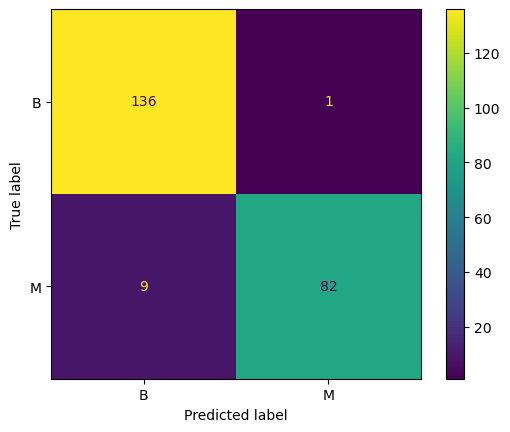

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, metrics
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, classification_report


import warnings

warnings.filterwarnings("ignore")


import pandas as pd

breast_cancer = pd.read_csv("data/breast_cancer.csv")

# On sépare les features du target
features, target = (
    breast_cancer.loc[:, "radius_mean":"fractal_dimension_worst"],
    breast_cancer["diagnosis"],
)

# On split notre dataframe en 2
feat_train, feat_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4
)

# On standardise
scaler = StandardScaler()
feat_train = scaler.fit_transform(feat_train)
feat_test = scaler.transform(feat_test)

# Fixer les valeurs des hyperparamètres à tester
param_grid = {"n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = "accuracy"

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(),  # un classifieur kNN
    param_grid,  # hyperparamètres à tester
    scoring=score,
)  # score à optimiser

clf.fit(feat_train, target_train)

plot_confusion_matrix(clf, feat_test, target_test)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :\n")
for mean, std, params in zip(
    clf.cv_results_["mean_test_score"],
    clf.cv_results_["std_test_score"],
    clf.cv_results_["params"],
):
    print("{} = {:.3f} (+/-{:.03f}) for {}".format(score, mean, std * 2, params))

y_pred = clf.predict(feat_test)
y_true = target_test

print("\n", classification_report(y_true, y_pred))


In [ ]:
"""
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, metrics
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import preprocessing

import warnings

warnings.filterwarnings("ignore")


import pandas as pd

breast_cancer = pd.read_csv("data/breast_cancer.csv")

# On sépare les features du target
features, target = (
    breast_cancer.loc[:, "radius_mean":"fractal_dimension_worst"],
    breast_cancer["diagnosis"],
)

# On split notre dataframe en 2
feat_train, feat_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4
)

# On standardise
scaler = StandardScaler()
feat_train = scaler.fit_transform(feat_train)
feat_test = scaler.transform(feat_test)


# Fixer les valeurs des hyperparamètres à tester
param_grid = {"n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = "accuracy"

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(),  # un classifieur kNN
    param_grid,  # hyperparamètres à tester
    cv=5,
    scoring=score,
)  # score à optimiser

clf.fit(feat_train, target_train)


# Afficher les performances correspondantes
print("Résultats de la validation croisée:")
for mean, std, params in zip(
    clf.cvresults["mean_test_score"],  # score moyen
    clf.cvresults["std_test_score"],
    clf.cvresults["params"],
):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(score, mean, std * 2, params))
"""